In [1]:
import os
import pandas as pd
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
csv_directory = os.getcwd()[:-23] + 'dataset\\'
csv_file = 'features.csv'
csv_file_path = os.path.join(csv_directory, csv_file)
dataset = pd.read_csv(csv_file_path, delimiter=';', usecols=['is_featured', 'version', 'tags_number', 'score', 
                                                             'is_best_time_to_launch', 'is_best_day_to_launch', 'is_weekend', 
                                                             'discretized_positive_description_score', 
                                                             'discretized_negative_description_score', 
                                                             'text_description_length', 
                                                             'sentence_length_in_the_description', 
                                                             'bullet_points_explicit_features', 
                                                             'emoji_in_description', 'tagline_length', 'emoji_in_tagline', 
                                                             'are_there_video', 'are_there_tweetable_images', 
                                                             'are_there_gif_images', 'number_of_gif', 'offers', 
                                                             'promo_discount_codes', 'are_there_questions', 
                                                             'hunter_has_twitter', 'hunter_has_website', 'hunter_followers', 
                                                             'hunter_apps_made', 'hunter_follows_up_on_comments', 
                                                             'maker_has_twitter', 'maker_has_website', 'maker_followers', 
                                                             'maker_started_comment_thread', 'maker_comment_ratio', 
                                                             'thread_length', 'hunter_is_maker', 
                                                             'discretized_maker_positive_comment_score', 
                                                             'discretized_maker_negative_comment_score', 
                                                             'discretized_others_positive_comment_score', 
                                                             'discretized_others_negative_comment_score', 
                                                             'topic'])
pd.set_option('display.max_columns', 39)
dataset.head()

,version,tags_number,is_featured,score,is_best_time_to_launch,is_best_day_to_launch,is_weekend,discretized_positive_description_score,discretized_negative_description_score,text_description_length,sentence_length_in_the_description,bullet_points_explicit_features,emoji_in_description,tagline_length,emoji_in_tagline,are_there_video,are_there_tweetable_images,are_there_gif_images,number_of_gif,offers,promo_discount_codes,are_there_questions,hunter_has_twitter,hunter_has_website,hunter_followers,hunter_apps_made,hunter_follows_up_on_comments,maker_has_twitter,maker_has_website,maker_followers,maker_started_comment_thread,maker_comment_ratio,thread_length,hunter_is_maker,discretized_maker_positive_comment_score,discretized_maker_negative_comment_score,discretized_others_positive_comment_score,discretized_others_negative_comment_score,topic
0,1.0,4,Yes,2771,Yes,Yes,No,True,False,Short,Short,No,No,Long,No,No,Yes,No,0,No,No,Yes,Yes,Yes,Low,Medium,Yes,Yes,Yes,Low,No,0.0,21,No,False,False,True,True,web development
1,1.0,6,Yes,313,No,No,No,True,False,Medium,Medium,No,No,Long,No,No,No,No,0,No,No,No,Yes,Yes,Low,Low,Yes,Yes,Yes,Low,No,0.0,3,No,False,False,True,False,web development
2,1.0,2,Yes,442,Yes,No,No,True,True,Long,Short,No,No,Long,No,No,No,No,0,No,No,No,Yes,No,High,High,Yes,Yes,Yes,Low,No,0.0,1,No,False,False,True,False,web development
3,1.0,3,Yes,208,No,No,Yes,True,False,Long,Short,No,No,Long,No,Yes,No,No,0,No,No,No,No,Yes,Low,Low,No,No,Yes,Low,No,0.0,3,Yes,False,False,False,False,community
4,1.0,4,Yes,166,No,No,No,False,True,Medium,Short,No,No,Medium,No,No,No,Yes,1,No,No,No,Yes,No,Low,Low,No,Yes,Yes,Low,No,0.0,8,No,True,True,True,True,community


# Test di normalità sulle variabili numeriche del dataset

In [3]:
numerical_data = dataset[['version', 'tags_number', 'score', 'number_of_gif', 'maker_comment_ratio', 'thread_length']]
numerical_data.head()

,version,tags_number,score,number_of_gif,maker_comment_ratio,thread_length
0,1.0,4,2771,0,0.0,21
1,1.0,6,313,0,0.0,3
2,1.0,2,442,0,0.0,1
3,1.0,3,208,0,0.0,3
4,1.0,4,166,1,0.0,8


In [4]:
def histogram_plot(data, histogram_title, figure_name):
    plt.figure(figsize=(7,6))
    plt.title(histogram_title, fontsize=14)
    plt.hist(data)
    plt.savefig(figure_name)

In [5]:
def qq_plot(data, figure_name):
    plt.figure(figsize=(7,6))
    qqplot(data, line='s')
    plt.savefig(figure_name)

In [6]:
def shapiro_test(data):
    stat, p_value = shapiro(data)
    print("Statistics = {:.3f}, p-value = {:.3f}".format(stat, p_value))
    alpha = 0.05
    if p_value > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

### Variabile *version*

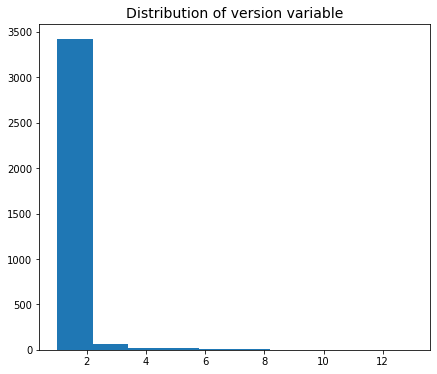

In [7]:
histogram_plot(numerical_data['version'], 'Distribution of version variable', 'version_distribution_(histogram).png')

<Figure size 504x432 with 0 Axes>

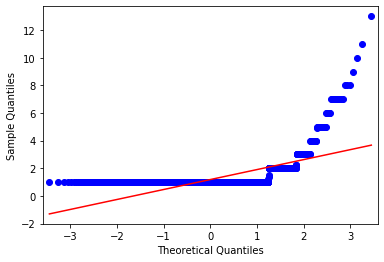

In [8]:
qq_plot(numerical_data['version'], 'version_distribution_(quantile-quantile).png')

In [9]:
shapiro_test(numerical_data['version'])

Statistics = 0.270, p-value = 0.000
Sample does not look Gaussian (reject H0)


### Variabile *tags number*

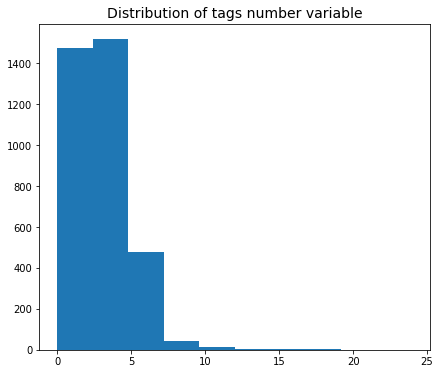

In [10]:
histogram_plot(numerical_data['tags_number'], 'Distribution of tags number variable', 
               'tags_number_distribution_(histogram).png')

<Figure size 504x432 with 0 Axes>

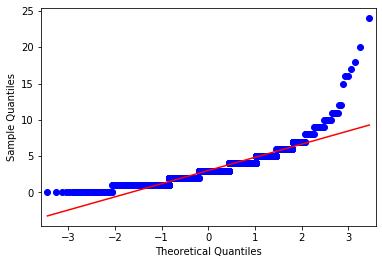

In [11]:
qq_plot(numerical_data['tags_number'], 'tags_number_distribution_(quantile-quantile).png')

In [12]:
shapiro_test(numerical_data['tags_number'])

Statistics = 0.861, p-value = 0.000
Sample does not look Gaussian (reject H0)


### Variabile score

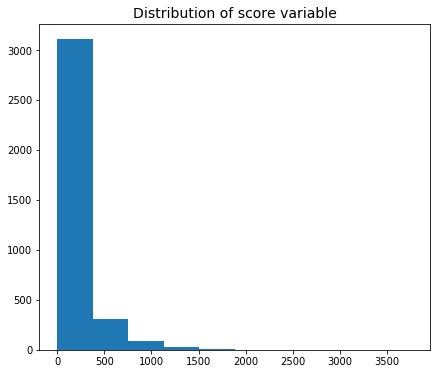

In [13]:
histogram_plot(numerical_data['score'], 'Distribution of score variable', 'score_distribution_(histogram).png')

<Figure size 504x432 with 0 Axes>

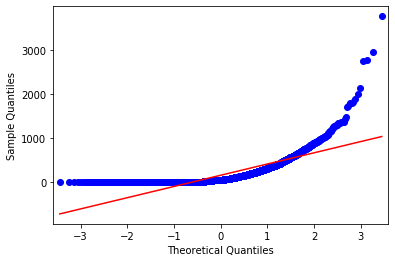

In [14]:
qq_plot(numerical_data['score'], 'score_distribution_(quantile-quantile).png')

In [15]:
shapiro_test(numerical_data['score'])

Statistics = 0.612, p-value = 0.000
Sample does not look Gaussian (reject H0)


### Variabile *number of gif*

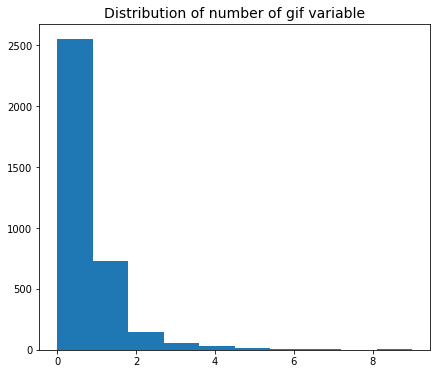

In [16]:
histogram_plot(numerical_data['number_of_gif'], 'Distribution of number of gif variable', 
               'number_of_gif_distribution_(histogram).png')

<Figure size 504x432 with 0 Axes>

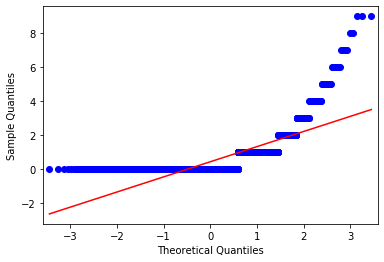

In [17]:
qq_plot(numerical_data['number_of_gif'], 'number_of_gif_distribution_(quantile-quantile).png')

In [18]:
shapiro_test(numerical_data['number_of_gif'])

Statistics = 0.515, p-value = 0.000
Sample does not look Gaussian (reject H0)


### Variabile *maker comment ratio*

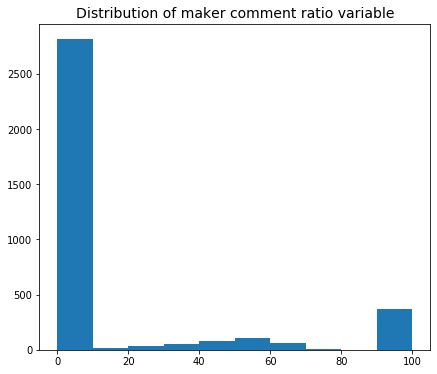

In [19]:
histogram_plot(numerical_data['maker_comment_ratio'], 'Distribution of maker comment ratio variable', 
               'maker_comment_ratio_distribution_(histogram).png')

<Figure size 504x432 with 0 Axes>

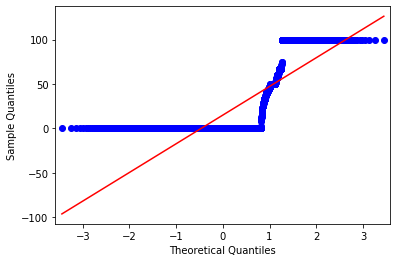

In [20]:
qq_plot(numerical_data['maker_comment_ratio'], 'maker_comment_ratio_distribution_(quantile-quantile).png')

In [21]:
shapiro_test(numerical_data['maker_comment_ratio'])

Statistics = 0.505, p-value = 0.000
Sample does not look Gaussian (reject H0)


### Variabile *thread length*

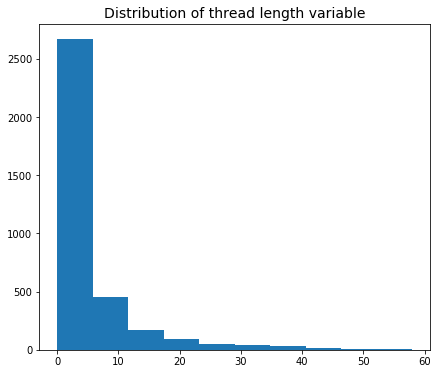

In [22]:
histogram_plot(numerical_data['thread_length'], 'Distribution of thread length variable', 
               'thread_length_distribution_(histogram).png')

<Figure size 504x432 with 0 Axes>

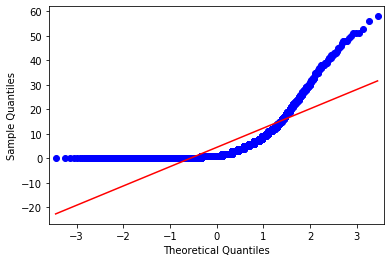

In [23]:
qq_plot(numerical_data['thread_length'], 'thread_length_distribution_(quantile-quantile).png')

In [24]:
shapiro_test(numerical_data['thread_length'])

Statistics = 0.615, p-value = 0.000
Sample does not look Gaussian (reject H0)
